In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


Objetivo explorar os dados de emissões de CO2 ao longo dos anos e indentificar padrões.

Carregamento dos dados

In [2]:
df = pd.read_csv(r'C:\Users\eriva\OneDrive\Desktop\analise-emissao_CO2\data\raw\annual-co2-emissions-per-country.csv')


In [16]:
print("Análisar as primeiras 5 linhas do DataFrame o head.")
print(df.head())

Análisar as primeiras 5 linhas do DataFrame o head.
        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0


In [17]:
print("Ver o arquivo como um todo")
print(df.info())

Ver o arquivo como um todo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB
None


Análise exploratória.

In [31]:
print("Fornece um resumo estatístico de todas as colunas númericas.")
df.describe()

Fornece um resumo estatístico de todas as colunas númericas.


,Year,Annual CO₂ emissions
count,29137.000000,2.913700e+04
mean,1947.718022,4.156982e+08
std,58.985133,1.945844e+09
min,1750.000000,0.000000e+00
25%,1912.000000,3.737280e+05
50%,1962.000000,4.990392e+06
75%,1994.000000,5.327268e+07
max,2023.000000,3.779157e+10


In [19]:
print("Conta o número de valores nulo de cada coluna.")
df.isnull().sum()

Conta o número de valores nulo de cada coluna.


Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [20]:
print("Retorna os valores nulos de uma coluna.")
df['Code'].unique()

Retorna os valores nulos de uma coluna.


array(['AFG', nan, 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA',
       'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX',
       'FS

In [21]:
print("Mostra quantas linhas duplicadas existem no DataFrame")
df.duplicated().sum()

Mostra quantas linhas duplicadas existem no DataFrame


np.int64(0)

In [33]:
print("Lista os nomes de todas as colunas.")
print(df.columns)

Lista os nomes de todas as colunas.
Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')


In [30]:
print("Conta a frequencia de cada valor em uma coluna.")
df['Annual CO₂ emissions'].value_counts()

Conta a frequencia de cada valor em uma coluna.


Annual CO₂ emissions
0.0          1106
3664.0        270
10992.0       164
47632.0       123
7328.0         99
             ... 
1980859.0       1
2384175.0       1
2153300.0       1
2232754.0       1
688594.0        1
Name: count, Length: 21854, dtype: int64

In [8]:
df['Year'].min() #primeiro ano


np.int64(1750)

In [9]:
df['Year'].max() #Ultimo ano

np.int64(2023)

In [24]:
df.columns = df.columns.str.strip()
df.rename(columns={'Entity': 'coutry', 'Annual CO₂ emissions': 'co2'}, inplace=True)


In [40]:
# Lista de entidades que NÃO são países e devem ser removidas
excluir = ['World', 'Asia', 'Africa', 'Europe', 'European Union (27)', 'European Union (28)',
    'North America', 'South America', 'Oceania', 'International transport',
    'High-income countries', 'Low-income countries', 'Upper-middle-income countries',
    'Lower-middle-income countries', 'Europe (excl. EU-27)', 'Asia (excl. China & India)',
    'Africa (excl. South Africa)', 'Asia (excl. China)', 'EU-27']

In [41]:
df_filtrado = df[
    (df['Year'] >= 1750) & (df['Year'] <= 2023) &
    (~df['country'].isin(excluir))
]
print(df_filtrado)

           country Code  Year         co2
0      Afghanistan  AFG  1949     14656.0
1      Afghanistan  AFG  1950     84272.0
2      Afghanistan  AFG  1951     91600.0
3      Afghanistan  AFG  1952     91600.0
4      Afghanistan  AFG  1953    106256.0
...            ...  ...   ...         ...
29132     Zimbabwe  ZWE  2019  10262950.0
29133     Zimbabwe  ZWE  2020   8494503.0
29134     Zimbabwe  ZWE  2021  10203630.0
29135     Zimbabwe  ZWE  2022  10424940.0
29136     Zimbabwe  ZWE  2023  11164030.0

[25967 rows x 4 columns]


In [42]:
df.columns.tolist()

['country', 'Code', 'Year', 'co2']

In [43]:
#Agrupar por país e somar as emissões
total_por_pais = df_filtrado.groupby('country')['co2'].sum()

print(total_por_pais)

country
Afghanistan          2.368414e+08
Africa (GCP)         5.259576e+10
Albania              3.041735e+08
Algeria              5.263690e+09
Andorra              1.623590e+07
                         ...     
Vietnam              5.259254e+09
Wallis and Futuna    8.337840e+05
Yemen                6.958331e+08
Zambia               2.739307e+08
Zimbabwe             8.150887e+08
Name: co2, Length: 233, dtype: float64


In [44]:
#Encontar o pís com maior emissão
pais_top=total_por_pais.idxmax()
valor_top= total_por_pais.max()
print(f"O país que mais emitiu CO² de 1750 até 2023 foi o país {pais_top} ,com {valor_top:,.2f} toneladas")

O país que mais emitiu CO² de 1750 até 2023 foi o país OECD (GCP) ,com 979,918,566,460.00 toneladas


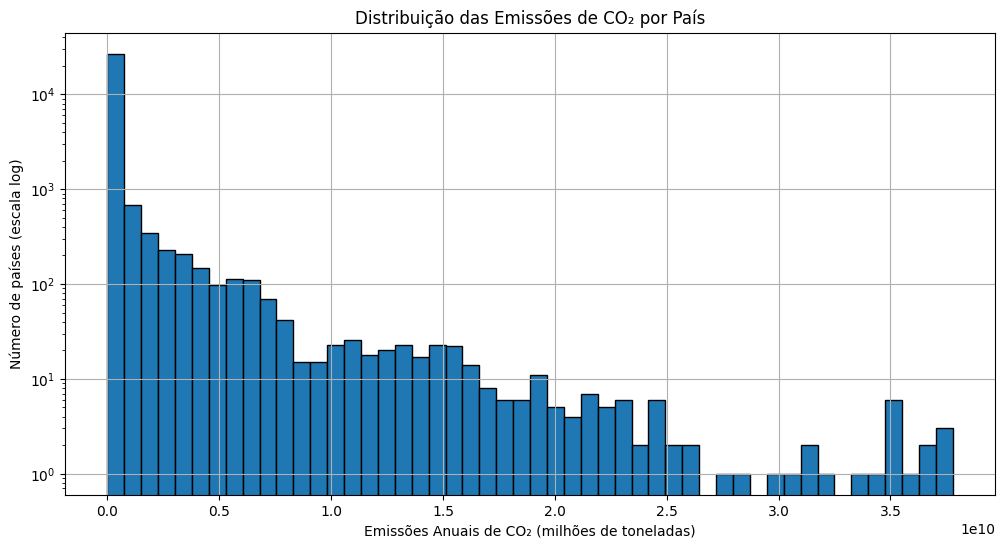

In [ ]:

df['Annual CO₂ emissions'].hist(#coluna com os dados
    bins=50, #define os números de intervalos(barras)
    figsize=(12,6),#controla o tamanho dá figura em polegadas
    log=True,  # Escala logarítmica no eixo Y
    edgecolor='black'#adiciona bordas preta a barras
)
plt.xlabel('Emissões Anuais de CO₂ (milhões de toneladas)')#rotulo do eixo x
plt.ylabel('Número de países (escala log)')#rotulo do eixo y
plt.title('Distribuição das Emissões de CO₂ por País') #título do gráfico
plt.show() #exibição do gráfico